<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202302/t36_Aula_6_TL_Overfit_Probabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# 0. Carga de bibliotecas
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # MSE

In [48]:
# 1. Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv")

In [49]:
# 2. Análise Exploratória
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [50]:
df.shape

(32, 12)

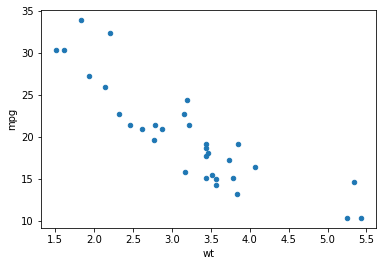

In [72]:
# Gráfico de dispersão
df.plot.scatter(x='wt', y='mpg')

# Transf. Polinomial
poly = skpp.PolynomialFeatures(17)  # Parâmetro da função é a ordem do polinômio

# Transf. Variáveis: LogLinear , Transf. Logaritm
df['wt_log'] = np.log(df['wt'])

<AxesSubplot:xlabel='wt_log', ylabel='mpg'>

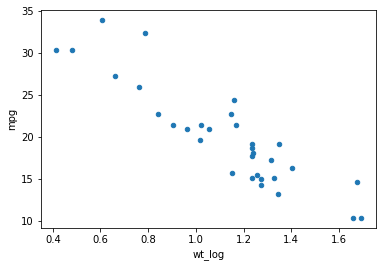

In [56]:
# Matriz de correlação
df.corr()
df.plot.scatter(x='wt_log', y='mpg')

In [73]:
# 3. Separação bases de treino e teste
# vamos utilizar a função train_test_split que facilita a construção de bases de treino e teste, onde escolhemos primeiro a(s) variável(is) exógenas
# 1a tentativa: RLS com var WT
# x_treino, x_teste, y_treino, y_teste = train_test_split( df[['wt']], df['mpg'], test_size=0.25, random_state=33 )
# 2a tentativa: RLS com var WT_log
# x_treino, x_teste, y_treino, y_teste = train_test_split( df[['wt_log']], df['mpg'], test_size=0.25, random_state=33 )
# 3a tentativa: RLS com transf. polinomial
x_treino, x_teste, y_treino, y_teste = train_test_split( df[['wt']], df['mpg'], test_size=0.25, random_state=33 )
x_treino, x_teste = poly.fit_transform(x_treino), poly.fit_transform(x_teste)

In [74]:
# 4. Modelo de Regressão Linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)
print(mod.score( x_treino, y_treino )) # R2

0.9452858882292412


In [75]:
# 5. Erro de previsão
y_prev = mod.predict(x_teste)
print(mean_squared_error(y_teste, y_prev)) 

2358238.3918441283


## **2a Parte: Classificadores**
Teoria das Probabilidades

In [80]:
dfTit = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')
dfTit.shape

dfTit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# Matriz de contingência
pd.crosstab(dfTit['Survived'], dfTit['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [85]:
# Sobreviventes
print(233+109)
print((233+109) /891)

342
0.3838383838383838


In [86]:
# Matriz de contingência das probabilidades
pd.crosstab(dfTit['Survived'], dfTit['Sex'])/891

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [88]:
233/314


0.7420382165605095